<a href="https://colab.research.google.com/github/Polargenius/Colab_Notebook/blob/main/Week_5_ADAP_FE259657360430.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')

# Set style for better looking plots
plt.style.use('default')
sns.set_palette("husl")

print("All libraries imported successfully!")
print("Libraries used:")
print("- pandas: Data manipulation and analysis")
print("- matplotlib: Creating static visualizations")
print("- numpy: Numerical computing")
print("- seaborn: Statistical data visualization")

All libraries imported successfully!
Libraries used:
- pandas: Data manipulation and analysis
- matplotlib: Creating static visualizations
- numpy: Numerical computing
- seaborn: Statistical data visualization


In [ ]:
# Method 1: Upload file directly
from google.colab import files
print("Please upload your 'students_performance_records.xlsx' file:")
uploaded = files.upload()

Please upload your 'students_performance_records.xlsx' file:


Saving students_performance_records.xlsx to students_performance_records.xlsx


In [ ]:
try:
  # Try to load the Excel file
    df = pd.read_excel('students_performance_records.xlsx')
    print("Dataset loaded successfully!")
    print(f"Dataset shape: {df.shape} (rows, columns)")
except FileNotFoundError:
    print("File not found. Please make sure you've uploaded the file.")
    # Create sample data for demonstration
    print("Creating sample data for demonstration...")

    np.random.seed(42)
    n_students = 500

    grade_classes = ['Grade 9', 'Grade 10', 'Grade 11', 'Grade 12']

    df = pd.DataFrame({
        'StudentID': range(1, n_students + 1),
        'GradeClass': np.random.choice(grade_classes, n_students),
        'GPA': np.random.normal(3.0, 0.8, n_students).clip(0, 4),
        'StudyTimeWeekly': np.random.exponential(10, n_students).clip(1, 40),
        'Absences': np.random.poisson(5, n_students).clip(0, 30),
        'Age': np.random.normal(16, 1.5, n_students).clip(14, 19)
    })

Dataset loaded successfully!
Dataset shape: (2392, 15) (rows, columns)


In [ ]:
    # Round numerical values
    df['GPA'] = df['GPA'].round(2)
    df['StudyTimeWeekly'] = df['StudyTimeWeekly'].round(1)
    df['Age'] = df['Age'].round(0).astype(int)

    print("Sample dataset created for demonstration!")

# Display basic information about the dataset
print("\n" + "="*50)
print("DATASET OVERVIEW")
print("="*50)
print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print("\nFirst 5 rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nBasic Statistics:")
print(df.describe())

Sample dataset created for demonstration!

DATASET OVERVIEW
Dataset shape: (2392, 15)
Columns: ['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA', 'GradeClass']

First 5 rows:
   StudentID  Age  Gender  Ethnicity ParentalEducation  StudyTimeWeekly  \
0       1001   17    Male  Caucasian      Some College             19.8   
1       1002   18  Female  Caucasian       High School             15.4   
2       1003   15  Female      Asian        Bachelor's              4.2   
3       1004   17    Male  Caucasian        Bachelor's             10.0   
4       1005   17    Male  Caucasian      Some College              4.7   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports Music  \
0         7         1                2                0       0   YES   
1         0         0                1                0       0    No   
2        26       

In [ ]:
# ============================================================================
# DATA CLEANING AND PREPROCESSING
# ============================================================================

print("\n" + "="*50)
print("DATA CLEANING AND PREPROCESSING")
print("="*50)

# Check for missing values
print("Missing Values Count:")
missing_values = df.isnull().sum()
print(missing_values)

if missing_values.sum() == 0:
    print("No missing values found!")
else:
    print("Handling missing values...")
    # Handle missing values based on column type
    for column in df.columns:
        if df[column].dtype in ['float64', 'int64']:
            # Fill numerical columns with median
            df[column].fillna(df[column].median(), inplace=True)
        else:
            # Fill categorical columns with mode
            df[column].fillna(df[column].mode()[0], inplace=True)
    print("Missing values handled!")

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nDuplicate rows: {duplicates}")

if duplicates > 0:
    df.drop_duplicates(inplace=True)
    print("Duplicate rows removed!")
else:
    print("No duplicate rows found!")

# Check data consistency
print("\n Data Consistency Checks:")

# Check GPA range (should be 0-4)
gpa_outliers = df[(df['GPA'] < 0) | (df['GPA'] > 4)]
print(f"GPA outliers (outside 0-4 range): {len(gpa_outliers)}")

# Check for negative study time or absences
negative_study = df[df['StudyTimeWeekly'] < 0]
negative_absences = df[df['Absences'] < 0]
print(f"Negative study time entries: {len(negative_study)}")
print(f"Negative absences entries: {len(negative_absences)}")

# Clean inconsistent data
df['GPA'] = df['GPA'].clip(0, 4)
df['StudyTimeWeekly'] = df['StudyTimeWeekly'].clip(0, None)
df['Absences'] = df['Absences'].clip(0, None)

print("Data consistency checks completed and corrected!")


DATA CLEANING AND PREPROCESSING
Missing Values Count:
StudentID            0
Age                  0
Gender               2
Ethnicity            1
ParentalEducation    1
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64
Handling missing values...
Missing values handled!

Duplicate rows: 0
No duplicate rows found!

 Data Consistency Checks:
GPA outliers (outside 0-4 range): 0
Negative study time entries: 0
Negative absences entries: 0
Data consistency checks completed and corrected!


In [ ]:
# ============================================================================
# GROUP DATA AND CALCULATE AVERAGE GPA BY GRADE CLASS
# ============================================================================

print("\n" + "="*50)
print("GROUPING DATA BY GRADE CLASS")
print("="*50)

# Group by GradeClass and calculate average GPA
avg_gpa_by_grade = df.groupby('GradeClass')['GPA'].mean().round(2)
print("Average GPA by Grade Class:")
print(avg_gpa_by_grade)

# Additional statistics by grade
grade_stats = df.groupby('GradeClass').agg({
    'GPA': ['mean', 'std', 'count'],
    'StudyTimeWeekly': 'mean',
    'Absences': 'mean'
}).round(2)

print("\nDetailed Statistics by Grade Class:")
print(grade_stats)


GROUPING DATA BY GRADE CLASS
Average GPA by Grade Class:
GradeClass
0    3.10
1    3.00
2    2.66
3    2.22
4    1.21
Name: GPA, dtype: float64

Detailed Statistics by Grade Class:
             GPA             StudyTimeWeekly Absences
            mean   std count            mean     mean
GradeClass                                           
0           3.10  0.95   107           11.86     5.75
1           3.00  0.63   269           11.12     5.31
2           2.66  0.38   391           10.35     7.25
3           2.22  0.36   414            9.76    11.43
4           1.21  0.55  1211            9.18    20.79



CREATING BAR CHART FOR AVERAGE GPA BY GRADE CLASS


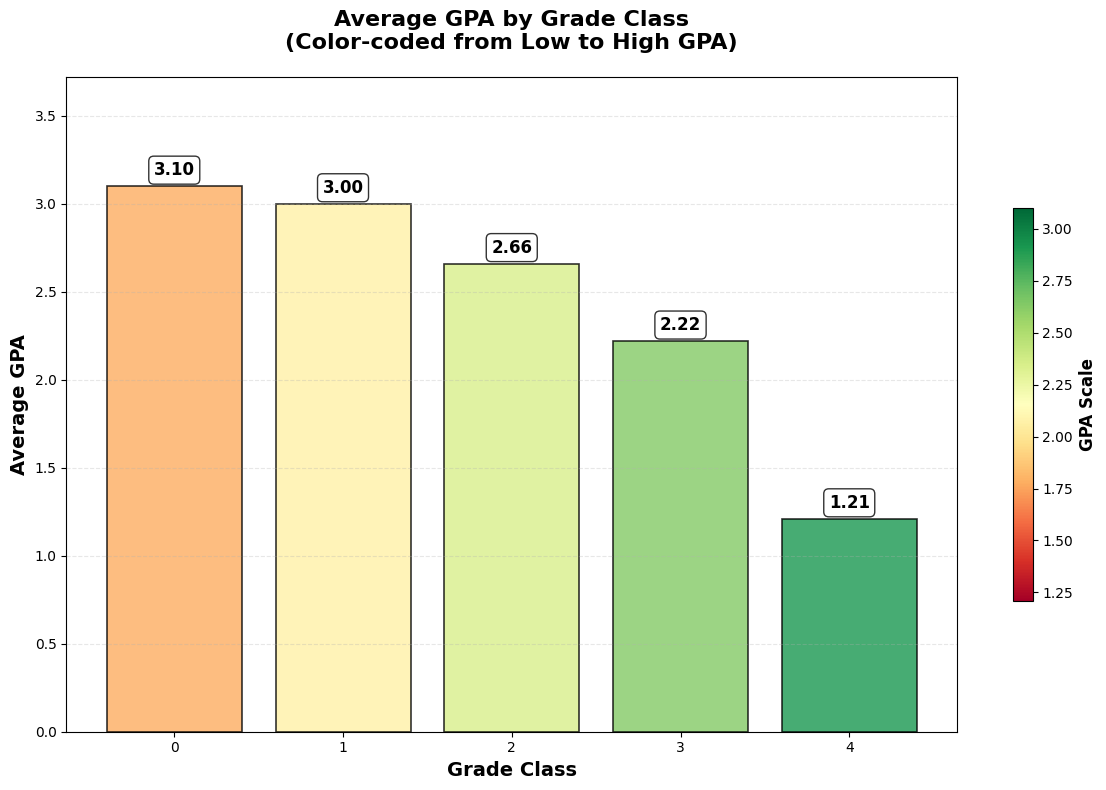

Bar chart created successfully!


In [ ]:
# ============================================================================
# CREATE BAR CHART WITH COLORMAP AND ANNOTATIONS
# ============================================================================

print("\n" + "="*50)
print("CREATING BAR CHART FOR AVERAGE GPA BY GRADE CLASS")
print("="*50)

# Create figure and axis
plt.figure(figsize=(12, 8))

# Get data for plotting
grades = avg_gpa_by_grade.index
gpa_values = avg_gpa_by_grade.values

# Create colormap based on GPA values
colors = plt.cm.RdYlGn(np.linspace(0.3, 0.9, len(gpa_values)))  # Red to Green gradient

# Create bar chart
bars = plt.bar(grades, gpa_values, color=colors, alpha=0.8, edgecolor='black', linewidth=1.2)

# Add annotations on top of bars
for i, (grade, gpa) in enumerate(zip(grades, gpa_values)):
    plt.annotate(f'{gpa:.2f}',
                xy=(i, gpa),
                xytext=(0, 5),
                textcoords='offset points',
                ha='center',
                va='bottom',
                fontsize=12,
                fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

# Customize the plot
plt.title('Average GPA by Grade Class\n(Color-coded from Low to High GPA)',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Grade Class', fontsize=14, fontweight='bold')
plt.ylabel('Average GPA', fontsize=14, fontweight='bold')

# Set y-axis limits for better visualization
plt.ylim(0, max(gpa_values) * 1.2)

# Add grid for better readability
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Add colorbar to show the GPA scale
sm = plt.cm.ScalarMappable(cmap=plt.cm.RdYlGn,
                          norm=plt.Normalize(vmin=min(gpa_values), vmax=max(gpa_values)))
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca(), shrink=0.6)
cbar.set_label('GPA Scale', fontsize=12, fontweight='bold')

# Improve layout
plt.tight_layout()
plt.show()

print("Bar chart created successfully!")


CREATING SCATTER MATRIX


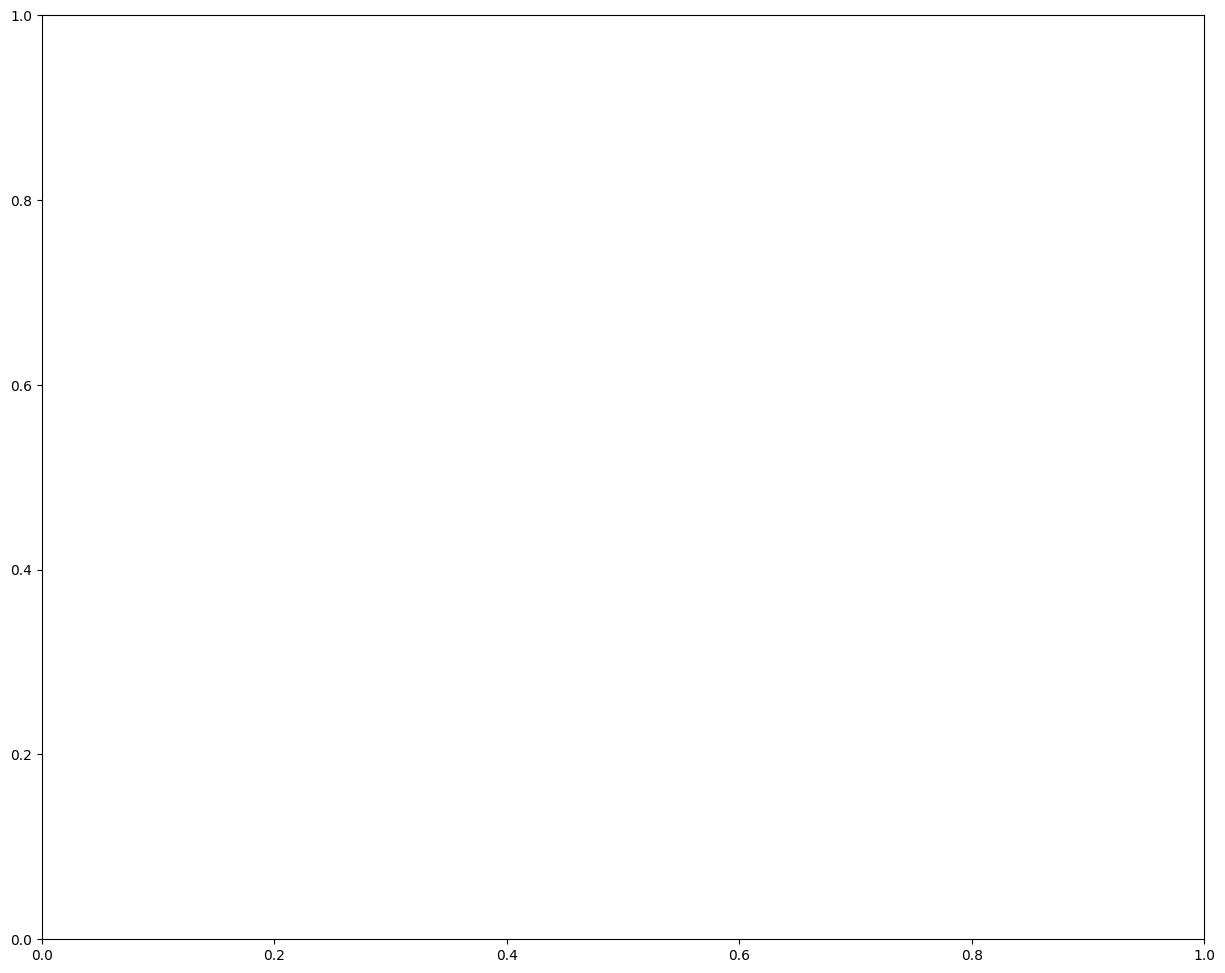

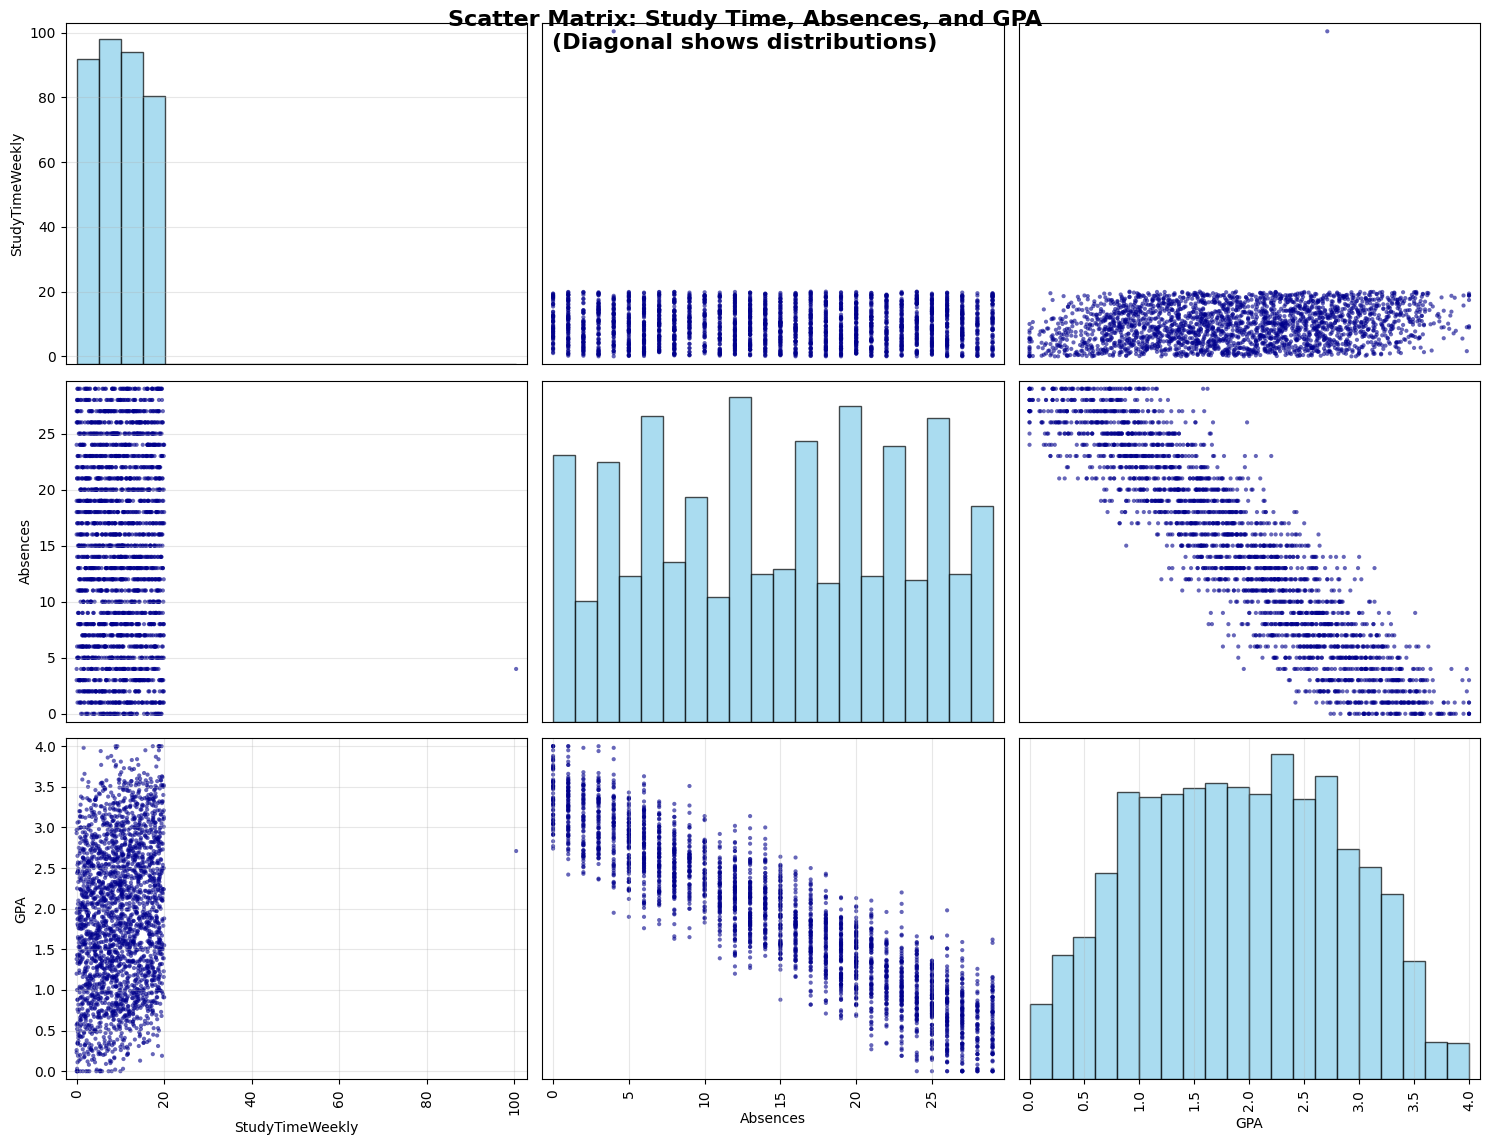

Scatter matrix created successfully!

Correlation Matrix:
                 StudyTimeWeekly  Absences    GPA
StudyTimeWeekly            1.000     0.001  0.176
Absences                   0.001     1.000 -0.919
GPA                        0.176    -0.919  1.000


In [ ]:
# ============================================================================
# CREATE SCATTER MATRIX
# ============================================================================

print("\n" + "="*50)
print("CREATING SCATTER MATRIX")
print("="*50)

# Select variables for scatter matrix
variables = ['StudyTimeWeekly', 'Absences', 'GPA']
scatter_data = df[variables]

# Create scatter matrix
fig, axes = plt.subplots(figsize=(15, 12))

# Create scatter matrix with custom styling
scatter_matrix(scatter_data,
               alpha=0.6,
               figsize=(15, 12),
               diagonal='hist',
               color='darkblue',
               hist_kwds={'bins': 20, 'alpha': 0.7, 'color': 'skyblue', 'edgecolor': 'black'})

# Customize the plot
plt.suptitle('Scatter Matrix: Study Time, Absences, and GPA\n(Diagonal shows distributions)',
             fontsize=16, fontweight='bold', y=0.95)

# Add grid to all subplots
for ax in plt.gcf().get_axes():
    ax.grid(True, alpha=0.3)
    ax.tick_params(labelsize=10)

plt.tight_layout()
plt.show()

print("Scatter matrix created successfully!")

# Calculate correlations
print("\nCorrelation Matrix:")
correlation_matrix = scatter_data.corr().round(3)
print(correlation_matrix)


CREATING BOX PLOT FOR STUDY TIME BY GRADE CLASS


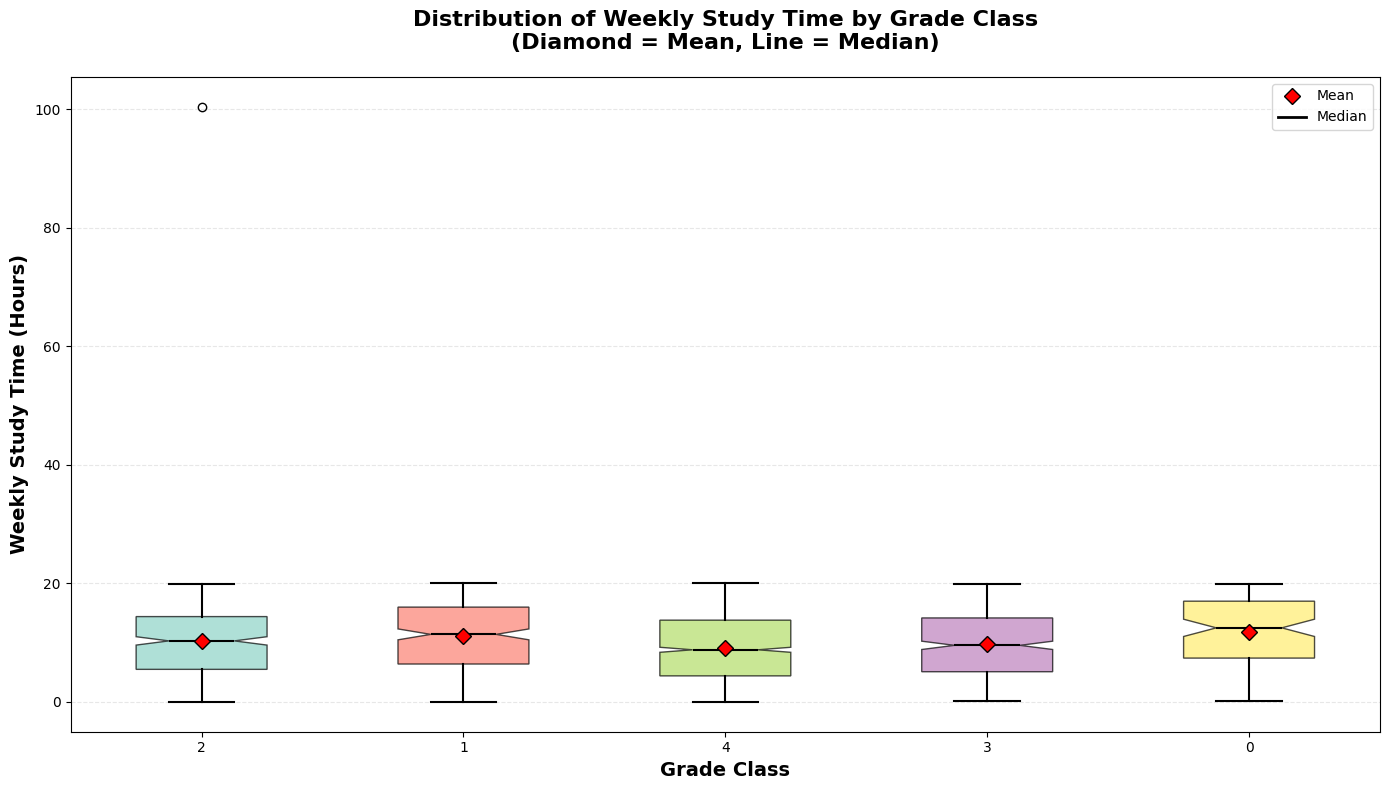

Box plot created successfully!

Summary Statistics for Study Time by Grade Class:
             count   mean   std  min  25%    50%    75%    max
GradeClass                                                    
0            107.0  11.86  5.73  0.2  7.4  12.50  17.00   19.9
1            269.0  11.12  5.62  0.0  6.4  11.40  16.00   20.0
2            391.0  10.35  7.13  0.0  5.5  10.30  14.40  100.4
3            414.0   9.76  5.64  0.1  5.1   9.55  14.18   19.9
4           1211.0   9.18  5.62  0.0  4.4   8.80  13.80   20.0


In [ ]:
# ============================================================================
# CREATE BOX PLOT FOR STUDY TIME BY GRADE CLASS
# ============================================================================

print("\n" + "="*50)
print("CREATING BOX PLOT FOR STUDY TIME BY GRADE CLASS")
print("="*50)

# Create figure
plt.figure(figsize=(14, 8))

# Get unique grade classes and create color palette
unique_grades = df['GradeClass'].unique()
colors = plt.cm.Set3(np.linspace(0, 1, len(unique_grades)))

# Create box plot
box_plot = plt.boxplot([df[df['GradeClass'] == grade]['StudyTimeWeekly'] for grade in unique_grades],
                       labels=unique_grades,
                       patch_artist=True,
                       notch=True,
                       showmeans=True)

# Customize colors for each box
for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

# Customize other elements
for element in ['whiskers', 'fliers', 'medians', 'caps']:
    plt.setp(box_plot[element], color='black', linewidth=1.5)

# Mark means with different style
plt.setp(box_plot['means'], marker='D', markerfacecolor='red',
         markeredgecolor='black', markersize=8)

# Customize the plot
plt.title('Distribution of Weekly Study Time by Grade Class\n(Diamond = Mean, Line = Median)',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Grade Class', fontsize=14, fontweight='bold')
plt.ylabel('Weekly Study Time (Hours)', fontsize=14, fontweight='bold')

# Add grid
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Add legend for mean and median
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='D', color='w', markerfacecolor='red',
                         markeredgecolor='black', markersize=8, label='Mean'),
                  Line2D([0], [0], color='black', linewidth=2, label='Median')]
plt.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.show()

print("Box plot created successfully!")

# Summary statistics for study time by grade
print("\nSummary Statistics for Study Time by Grade Class:")
study_time_summary = df.groupby('GradeClass')['StudyTimeWeekly'].describe().round(2)
print(study_time_summary)